#  Теория вероятностей и математическая статистика

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import stats
import statistics
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [32]:
def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [33]:
def anova(*ys: np.ndarray) -> float:
    """Функция возвращает значение F-статистики
    для дисперсионного анализа.
    """
    
    y = np.concatenate(ys)

    ss_b = sum((yi.mean() - y.mean()) ** 2 * yi.size for yi in ys)
    ss_w = sum(((yi - yi.mean()) ** 2).sum() for yi in ys)
    
    sigma_b = ss_b / (len(ys) - 1)
    sigma_w = ss_w / (y.size - len(ys))
    
    return sigma_b / sigma_w


## Домашнее задание 8

**Задача 1**

Используя данные о хоккеистах (скачать можно [здесь](https://habr.com/ru/post/301340/)), проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие роста. В качестве ответа запишите 1, если является, и 0 иначе.

**Решение**

In [34]:
df = pd.read_csv('hockey_players.csv')

df.head(15)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694
5,2001,RUS,4,zhukov sergei,D,L,193,93.0,1975-11-23,lokomotiv yaroslavl,25.437372,1975,24.967113
6,2001,RUS,6,evstafiev andrei,D,L,176,84.0,1972-08-09,lokomotiv yaroslavl,28.725530,1972,27.117769
7,2001,RUS,7,krasotkin dmitri,D,L,183,91.0,1971-08-28,lokomotiv yaroslavl,29.675565,1971,27.173102
8,2001,RUS,13,razin andrei,F,L,180,85.0,1973-10-23,metallurg magnitogorsk,27.520876,1973,26.234568
9,2001,RUS,14,datsyuk pavel,F,L,178,86.0,1978-07-20,ak bars kazan,22.781656,1978,27.143037


In [47]:
df.shape

(6292, 13)

In [48]:
df.drop_duplicates().shape

(6292, 13)

In [ ]:
# Дублей в выборке нет, преобразований не требуется

In [35]:
df['country'].value_counts()

SWE    400
RUS    400
SVK    397
FIN    396
CZE    394
SUI    394
USA    388
LAT    388
CAN    388
GER    374
BLR    346
DEN    340
NOR    290
FRA    249
AUT    242
SLO    198
ITA    195
KAZ    175
UKR    169
JPN     96
HUN     50
POL     23
Name: country, dtype: int64

In [36]:
countries = ['FIN', 'NOR', 'DEN']

In [37]:
ys = [df.loc[df['country'] == country, 'height'] for country in countries]

F = anova(*ys)
F

4.273207343917213

In [38]:
k = len(countries)
n = sum(y.size for y in ys)

k1 = k - 1
k2 = n - k

k1, k2, n, k

(2, 1023, 1026, 3)

In [39]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t


3.0045220661840073

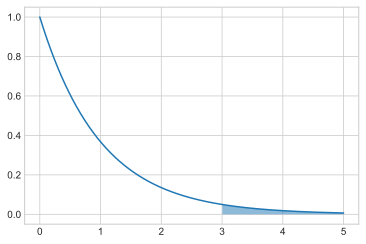

In [40]:
ox = np.linspace(0, 5, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 5, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)


Статистика попала в критическую область, значит между ростами хоккеистов выбранных стран действительно есть значимое отличие.

In [41]:
ys_1 = [df.loc[df['country'] == country, 'bmi'] for country in countries]

F_1 = anova(*ys_1)
F_1

36.05816727743814

Статистика для bmi попала в критическую область, значит между bmi хоккеистов выбранных стран есть значимое отличие

In [42]:
Ответ: 1